# Modelo de reconocimiento de emociones
dataset: https://www.kaggle.com/datasets/msambare/fer2013/

El objetivo que me fijé fue crear una red neuronal convolucional para el reconocimiento de emociones en caras. Usé el dataste FER2013 que tiene fotos de las emociones enojo, disgusto, miedo, felicidad, neutral, tristeza y sorpresa.

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
import os
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [3]:
train_data = 'C:\\Users\\AGUSTINA\\OneDrive\\Documentos\\GitHub\\Reconocimiento-de-emociones\\FER-2013\\train'
test_data = 'C:\\Users\\AGUSTINA\\OneDrive\\Documentos\\GitHub\\Reconocimiento-de-emociones\\FER-2013\\test'

In [4]:
classes = clases = os.listdir(train_data)
classes

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [17]:
def show_image (path):
    image = mpimg.imread(path)
    plt.imshow(image)
    plt.axis('off')  # Para ocultar los ejes
    plt.show()

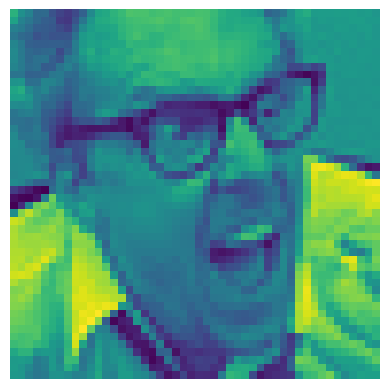

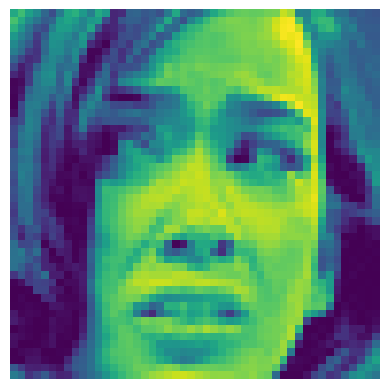

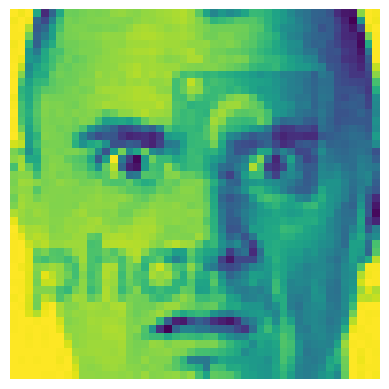

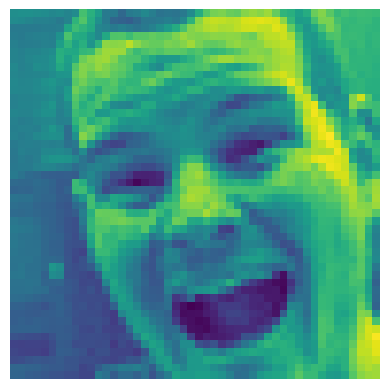

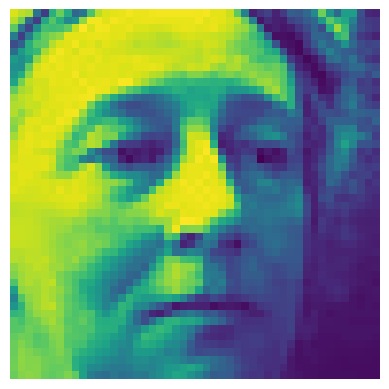

In [ ]:
show_image('C:\\Users\\AGUSTINA\\OneDrive\\Documentos\\GitHub\\Reconocimiento-de-emociones\\FER-2013\\train\\angry\\Training_3908.jpg')
show_image('C:\\Users\\AGUSTINA\\OneDrive\\Documentos\\GitHub\\Reconocimiento-de-emociones\\FER-2013\\train\\disgust\\Training_659019.jpg')
show_image('C:\\Users\\AGUSTINA\\OneDrive\\Documentos\\GitHub\\Reconocimiento-de-emociones\\FER-2013\\train\\fear\\Training_308765.jpg')
show_image('C:\\Users\\AGUSTINA\\OneDrive\\Documentos\\GitHub\\Reconocimiento-de-emociones\\FER-2013\\train\\happy\\Training_11204.jpg')
show_image('C:\\Users\\AGUSTINA\\OneDrive\\Documentos\\GitHub\\Reconocimiento-de-emociones\\FER-2013\\train\\sad\\Training_2913.jpg')

In [6]:
#agrego las labels y hago el preprocesamiento de los datos
def add_label_and_normalize (data):
    images = []
    labels = []
    for clas in classes:
        class_path = os.path.join(data, clas)
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)
            image = Image.open(image_path)

            #transformo a la imagen en un array de numpy
            image = np.array(image)

            #normalizo
            image = image / 255.0 
            
            images.append(image)
            labels.append(clas)

    return images, labels

In [8]:
X_train, y_train = add_label_and_normalize(train_data)
X_test, y_test = add_label_and_normalize(test_data)

In [ ]:
#Función para ver la cantidad de muestras por clase
def plot_classes(y):
    class_freq = Counter(y)
    clases = list(class_freq.keys())
    cantidades = list(class_freq.values())

    plt.figure(figsize=(8, 6))
    plt.bar(clases, cantidades, color='skyblue')
    plt.xlabel('Clases')
    plt.ylabel('Cantidad de muestras')
    plt.title('Cantidad de muestras por clase')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

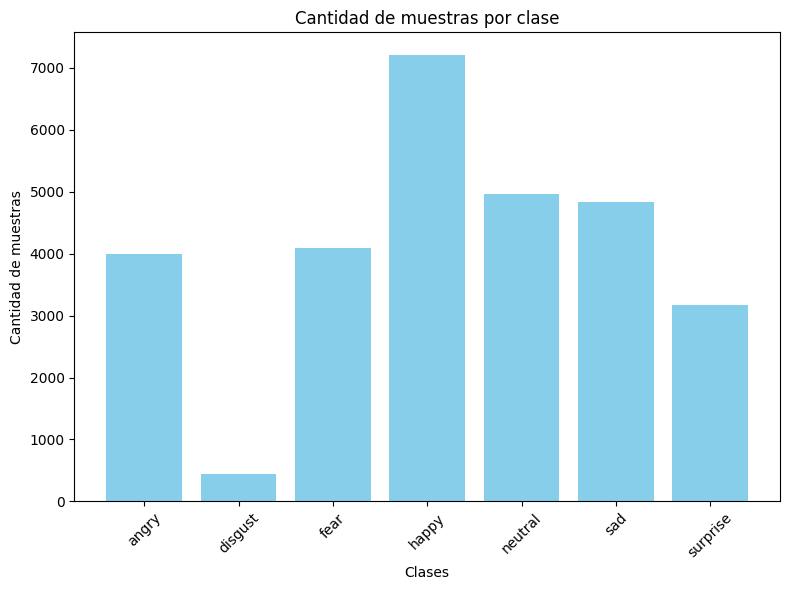

In [121]:
plot_classes(y_train)

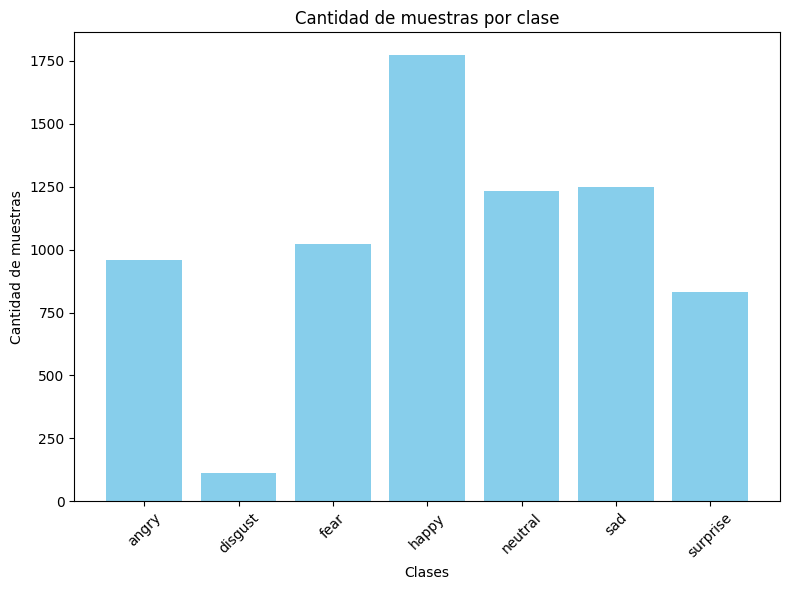

In [122]:
plot_classes(y_test)

In [9]:
#Transformo las X en arrays de numpy
X_train = np.array(X_train)
X_test = np.array(X_test)

#Encodeo los nombres de las clases en números
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)

#Hago one-hot encoding
y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)

In [10]:
#Data augmentation para la clase disgust
def disgust_data_augmentation(X, y):
    disgust_index = np.where(y == "disgust")[0]
    disgust_samples = X[disgust_index]

    datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    for i in range(len(disgust_samples)):
        sample = disgust_samples[i]
        sample = sample.reshape((1,) + sample.shape) 

        for batch in datagen.flow(sample, batch_size=1):
            X = np.vstack((X, batch[0]))
            break 

    new_disgust_labels = np.full(len(disgust_samples), "disgust")
    y = np.append(y, new_disgust_labels)

    return X, y

In [11]:
disgust_data_augmentation(X_train, y_train)
disgust_data_augmentation(X_test, y_test)

(array([[[0.18039216, 0.13333333, 0.10196078, ..., 0.03921569,
          0.05098039, 0.08627451],
         [0.19607843, 0.10980392, 0.08235294, ..., 0.04313725,
          0.03921569, 0.08235294],
         [0.19607843, 0.10588235, 0.05882353, ..., 0.08627451,
          0.09411765, 0.08627451],
         ...,
         [0.81568627, 0.70196078, 0.42352941, ..., 0.74901961,
          0.80392157, 0.8       ],
         [0.83137255, 0.77647059, 0.58431373, ..., 0.70980392,
          0.78431373, 0.8       ],
         [0.81568627, 0.78823529, 0.67058824, ..., 0.64705882,
          0.70588235, 0.74117647]],
 
        [[0.21568627, 0.12941176, 0.21176471, ..., 0.15686275,
          0.16470588, 0.20392157],
         [0.16862745, 0.16470588, 0.14117647, ..., 0.24313725,
          0.29411765, 0.33333333],
         [0.17647059, 0.21176471, 0.07058824, ..., 0.32941176,
          0.4       , 0.43529412],
         ...,
         [0.94901961, 0.94117647, 0.94901961, ..., 0.59607843,
          0.69411765, 0.

In [12]:
X_train.shape

(28708, 48, 48)

In [13]:
#Creo mi modelo con keras
model = tf.keras.models.Sequential([
    Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(48, 48, 1)),
    MaxPooling2D(pool_size=2),
    
    Conv2D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling2D(pool_size=2),
    
    Conv2D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling2D(pool_size=2),

    Flatten(),
    
    Dense(128, activation='relu'),
    Dropout(0.5),

    Dense(8, activation='relu'),
    
    Dense(7, activation='softmax')
])


### Arquitectura del modelo

Empecé mi modelo mi modelo con una serie de **convoluciones 2D**. Estas convoluciones, que utilizan un kernel de tamaño 3x3, son una técnica que permite filtrar una imagen y aprender progresivamente las diferentes características que tiene. Se analizan los pixeles de mi imagen en un tamaño de "cuadrado" determinado. EN mi caso, mi cuadrado es de 3x3 pixeles, es decir, que en cada convolución toma 9 pixeles que luego van a pasar por la capa de pooling.
Después de cada convolución, apliqué **max pooling 2D** con un tamaño de 2x2. Las capas de pooling se usan para reducir el tamaño de los datos analizados tomando conservando únicamente los valores más relevantes para la identificación de características. Con un max pooling lo que hago es quedarme unicamente con los valores más relevantes que analiza el kernel.
Las convoluciones junto con los pools nos permiten identificar caracteristicas que se van haciendo cada vez más específicas. En lugar de aprenderse la ubicación de los pixeles de una imagen, mi modelo aprende sobre las características más generales de mis imagenes.
Una vez que mis datos se analizaron en su forma bidimensional original, apliqué una capa **flatten** para aplanar los datos y convertirlos en un vector unidimensional. Este paso es necesario para poder conectar las capas convolucionales con las capas densas.
Continué con varias **capas densas**, que son capas de red neuronal de conexión completa (fully connected). En un punto, apliqué un **Dropout** del 50% de las neuronas. El Dropout es una técnica de regularización que ayuda a prevenir el sobreajuste al eliminar aleatoriamente ciertas neuronas de la red durante cada paso de entrenamiento.
Finalmente, para la capa de salida, utilicé la función de activación **softmax**. Esta función es ideal para problemas de clasificación multiclase, ya que proporciona una distribución de probabilidad para las diferentes clases. El número de neuronas en esta capa coincide con la cantidad de clases en mi conjunto de datos.

In [14]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [15]:
#Me separo una parte de los datos de test para validation
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [18]:
#Entreno el modelo
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

val_accuracy = history.history['val_accuracy']
print("Validation Accuracy:", val_accuracy)

Epoch 1/10
898/898 [==============================] - 18s 20ms/step - loss: 1.6310 - accuracy: 0.3550 - val_loss: 1.4702 - val_accuracy: 0.4327
Epoch 2/10
898/898 [==============================] - 17s 19ms/step - loss: 1.4824 - accuracy: 0.4186 - val_loss: 1.3919 - val_accuracy: 0.4581
Epoch 3/10
898/898 [==============================] - 17s 19ms/step - loss: 1.4041 - accuracy: 0.4549 - val_loss: 1.3660 - val_accuracy: 0.4709
Epoch 4/10
898/898 [==============================] - 17s 19ms/step - loss: 1.3405 - accuracy: 0.4828 - val_loss: 1.2882 - val_accuracy: 0.5071
Epoch 5/10
898/898 [==============================] - 17s 19ms/step - loss: 1.2854 - accuracy: 0.5068 - val_loss: 1.2519 - val_accuracy: 0.5213
Epoch 6/10
898/898 [==============================] - 17s 19ms/step - loss: 1.2416 - accuracy: 0.5295 - val_loss: 1.2270 - val_accuracy: 0.5389
Epoch 7/10
898/898 [==============================] - 17s 19ms/step - loss: 1.2042 - accuracy: 0.5384 - val_loss: 1.1939 - val_accuracy:

In [19]:
#Pruebo con test
test_loss, test_acc = model.evaluate(X_test, y_test)

113/113 [==============================] - 1s 7ms/step - loss: 1.2089 - accuracy: 0.5592


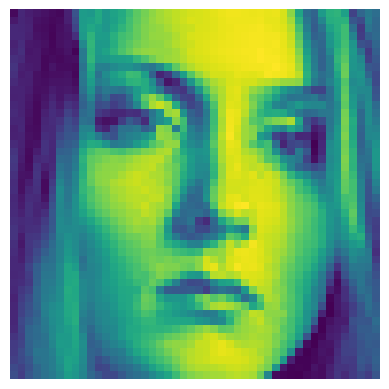

1/1 [==============================] - 0s 196ms/step
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 1.3548664e-16 1.0000000e+00
  7.8362839e-24 0.0000000e+00]]


In [20]:
image_path = 'C:\\Users\\AGUSTINA\\OneDrive\\Documentos\\GitHub\\Reconocimiento-de-emociones\\predict_sad.jpg'
predict_image = Image.open(image_path)

show_image(image_path)

predict_image = np.array(predict_image)
predict_image = np.expand_dims(predict_image, axis=0)  # Agregar una dimensión de lote (batch)

# Realizar la predicción
prediction = model.predict(predict_image)
print(prediction)

El anteúltimo número, el cual es el más alto, representa la categoría de tristeza, a la cual pertenece la foto de ejemplo que usé arriba. Por lo tanto, a el modelo le va relativamente bien